In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 데이터 불러오기
df = pd.read_csv('./titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 명목형 자료 변환

In [7]:
# replace를 이용해 수치 매핑
# male=0, female=1
df.replace({'male':0, 'female':1}, inplace=True)
df.Sex

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [8]:
# 더미 변수 사용
pd.get_dummies(df.Embarked)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


# 수치형 자료 변환

In [12]:
# 정규화(normalization, min-max scailing)
def normal(data):
    data_normal = data.apply(lambda x:(x-data.min())/(data.max()-data.min()))
    return data_normal

df['Fare_norm'] = normal(df.Fare)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_norm
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0.103644
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0.025374
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,0.058556
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.045771
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,0.058556


In [15]:
# 표준화(standardization)
def standard(data):
    data_standard = data.apply(lambda x:(x-data.mean())/data.std())
    return data_standard

df['Fare_standard'] = standard(df.Fare)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_norm,Fare_standard
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.014151,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0.139136,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.015469,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0.103644,0.420494
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.015713,-0.486064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0.025374,-0.386454
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,0.058556,-0.044356
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.045771,-0.176164
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,0.058556,-0.044356


# 결측값 처리

In [16]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    int64  
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Fare_norm      891 non-null    float64
 13  Fare_standard  891 non-null    float64
dtypes: float64(4), int64(6), object(4)
memory usage: 97.6+ KB


In [17]:
# Cabin 컬럼 제거
df_cabin = df.drop(columns=['Cabin'])
df_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_norm,Fare_standard
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0.014151,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0.139136,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0.015469,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0.103644,0.420494
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0.015713,-0.486064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S,0.025374,-0.386454
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,0.058556,-0.044356
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,S,0.045771,-0.176164
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,0.058556,-0.044356


In [19]:
# NaN이 포함된 행 제거
df_cabin_dropna = df_cabin.dropna()
df_cabin_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    712 non-null    int64  
 1   Survived       712 non-null    int64  
 2   Pclass         712 non-null    int64  
 3   Name           712 non-null    object 
 4   Sex            712 non-null    int64  
 5   Age            712 non-null    float64
 6   SibSp          712 non-null    int64  
 7   Parch          712 non-null    int64  
 8   Ticket         712 non-null    object 
 9   Fare           712 non-null    float64
 10  Embarked       712 non-null    object 
 11  Fare_norm      712 non-null    float64
 12  Fare_standard  712 non-null    float64
dtypes: float64(4), int64(6), object(3)
memory usage: 77.9+ KB


# 이상치 처리

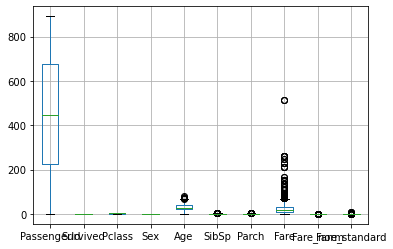

In [22]:
# 박스플롯으로 확인(동그란 점이 outlier를 뜻함)
df_cabin_dropna.boxplot()
df2 = df_cabin_dropna

In [24]:
# 나이가 정수가 아니라 실수인 행 확인
age_not_int = df2[(df2.Age-np.floor(df2.Age)) != 0]
age_not_int

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_norm,Fare_standard
57,58,0,3,"Novel, Mr. Mansouer",0,28.50,0,0,2697,7.2292,C,0.014110,-0.502582
78,79,1,2,"Caldwell, Master. Alden Gates",0,0.83,0,2,248738,29.0000,S,0.056604,-0.064480
111,112,0,3,"Zabour, Miss. Hileni",1,14.50,1,0,2665,14.4542,C,0.028213,-0.357190
116,117,0,3,"Connors, Mr. Patrick",0,70.50,0,0,370369,7.7500,Q,0.015127,-0.492101
122,123,0,2,"Nasser, Mr. Nicholas",0,32.50,1,0,237736,30.0708,C,0.058694,-0.042931
123,124,1,2,"Webber, Miss. Susan",1,32.50,0,0,27267,13.0000,S,0.025374,-0.386454
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",0,36.50,0,2,230080,26.0000,S,0.050749,-0.124850
152,153,0,3,"Meo, Mr. Alfonzo",0,55.50,0,0,A.5. 11206,8.0500,S,0.015713,-0.486064
153,154,0,3,"van Billiard, Mr. Austin Blyler",0,40.50,0,2,A/5. 851,14.5000,S,0.028302,-0.356269
203,204,0,3,"Youseff, Mr. Gerious",0,45.50,0,0,2628,7.2250,C,0.014102,-0.502666


In [26]:
# 최종적으로 이상치와 결측치를 제외한 데이터를 새로운 변수에 저장
df2_fin = df2[(df2.Age-np.floor(df2.Age)) == 0]

# 모델링을 위한 데이터 분리

In [28]:
from sklearn.model_selection import train_test_split

# 지도학습의 경우 feature/label data 분리
X = df2_fin.drop(columns=['Survived'])
y = df2_fin['Survived']

print('X의 데이터 개수:%d'%(len(X)))
print('y의 데이터 개수:%d'%(len(y)))

# train/test 데이터 분리

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=42)

print('학습한 데이터 개수 : %d' % len(train_X))
print('검증 데이터 개수 : %d' % len(test_X))

X의 데이터 개수:687
y의 데이터 개수:687
학습한 데이터 개수 : 480
검증 데이터 개수 : 207
